In [2]:
import pandas as pd
# import csv file from Data

results = pd.read_csv('data/trained_models/120epochs/all_best_results.csv')
results.head()

,assay,model_name,batch_size,dropout,hidden_dims,epochs,loss,auc_train,auc_val,auc_test,f1_train,f1_val,f1_test,precision_train,precision_val,precision_test,recall_train,recall_val,recall_test
0,2797,FP,128,0.2,256,120,0.112826,0.851811,0.648283,0.627574,0.816957,0.641878,0.618679,0.789344,0.636160,0.611314,0.851811,0.648283,0.627574
1,2797,GROVER_FP,256,0.3,256,120,0.114175,0.865640,0.737093,0.699163,0.737517,0.657729,0.627458,0.685675,0.626196,0.602023,0.865640,0.737093,0.699163
2,2796,FP,256,0.3,256,120,0.128539,0.910414,0.714899,0.678131,0.832835,0.678660,0.648834,0.786453,0.656956,0.631468,0.910414,0.714899,0.678131
3,2796,GROVER_FP,256,0.2,256,120,0.146486,0.892211,0.734448,0.705006,0.823970,0.695228,0.671443,0.781455,0.671401,0.651138,0.892211,0.734448,0.705006
4,1979,FP,128,0.2,128,120,0.132319,0.737685,0.533524,0.513408,0.785535,0.541363,0.515422,0.862647,0.561600,0.526389,0.737685,0.533524,0.513408


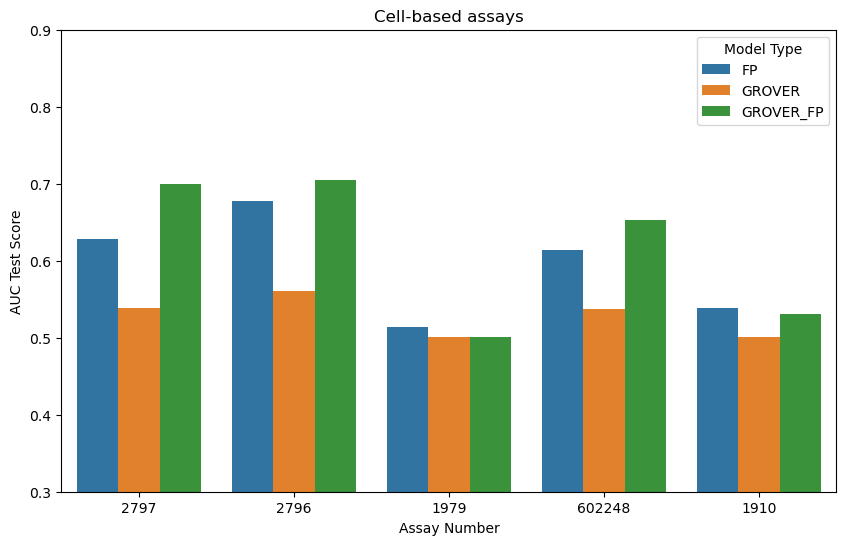

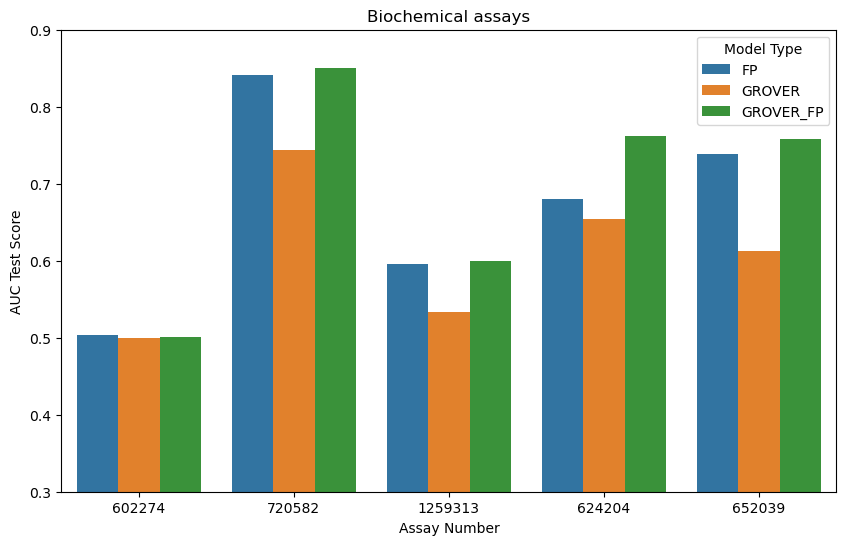

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
custom_order = [2797, 2796, 1979, 602248, 1910]
model_order = ['FP', 'GROVER', 'GROVER_FP']
sns.barplot(x='assay', y='auc_test', hue='model_name', data=results, order=custom_order, hue_order=model_order)

plt.title('Cell-based assays') #AUC Test Scores by Assay and Model Type
plt.ylabel('AUC Test Score')
plt.xlabel('Assay Number')
plt.legend(title='Model Type')
plt.gca().set_ylim([0.3, 0.9])  # For example, limits between 0 and 1
plt.show()

# Create the plot
plt.figure(figsize=(10, 6))
custom_order = [602274, 720582, 1259313, 624204, 652039]
model_order = ['FP', 'GROVER', 'GROVER_FP']
sns.barplot(x='assay', y='auc_test', hue='model_name', data=results, order=custom_order, hue_order=model_order)

plt.title('Biochemical assays') #AUC Test Scores by Assay and Model Type
plt.ylabel('AUC Test Score')
plt.xlabel('Assay Number')
plt.legend(title='Model Type')
plt.gca().set_ylim([0.3, 0.9])  
plt.show()

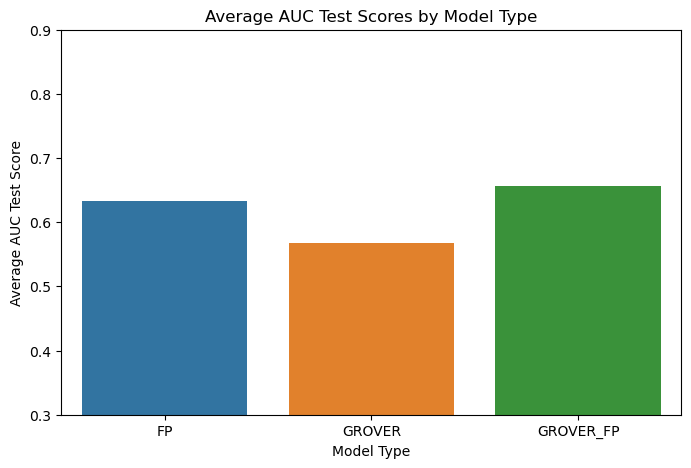

In [8]:
# Compute average AUC test score for each model type
average_scores = results.groupby("model_name")["auc_test"].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x='model_name', y='auc_test', data=average_scores)

plt.title('Average AUC Test Scores by Model Type')
plt.ylabel('Average AUC Test Score')
plt.xlabel('Model Type')
plt.gca().set_ylim([0.3, 0.9])
plt.show()

In [9]:
average_scores.head()

,model_name,auc_test
0,FP,0.633089
1,GROVER,0.568369
2,GROVER_FP,0.655999
